#Proyecto final DS - Segunda entrega

* Alumno: Rodrigo Caparros
* Comison: 49150

## Sección 1 - Abstract y contexto

###1.1 Abstract

La prevención de enfermedades mediante un análisis de grandes volumenes de datos es posible gracias las nuevas herramientas que nos brinda la ciencia de Datos. En el presente trabajo se utilizan dichas herramientas para identificar cuales son los factores que aumentan el riesgo de tener un ACV

###1.2 Contexto


Un derrame cerebral, también conocido como accidente cerebrovascular o ACV, se produce cuando una parte del cerebro pierde su suministro de sangre y la parte del cuerpo que controlan las células cerebrales privadas de sangre deja de funcionar. Esta pérdida de suministro de sangre puede ser isquémica debido a la falta de flujo sanguíneo o hemorrágica debido a una hemorragia en el tejido cerebral. Un accidente cerebrovascular es una emergencia médica porque puede provocar la muerte o una discapacidad permanente. Existen oportunidades para tratar los accidentes cerebrovasculares isquémicos, pero el tratamiento debe iniciarse en las primeras horas después de que comiencen los signos de un accidente cerebrovascular. Por ello es sumamente importante identificar a pacientes con alto riesgo de tener un accidente para poder tomar medidas preventivas y capacitaciones para poder actuar rápidamente.






##Sección 2 - Preguntas y objetivos del trabajo

###2.1 Objetivo

El objetivo final de presente trabajo es identificar los factores o combinación de factores que aumentan el riesgo de tener un ACV para poder actuar anticipadamente informando a pacientes de puedan padecerlo

###2.2 Preguntas a contestar

Se pantean interrogantes referidos a la relación entre la historia clínica del paciente y la relación entre diferentes parámetros


* ¿Que rango etario tiene mas riesgo de ACV?
   Respuesta: El promedio de edades es de 68 años, a moyor edad mayor riesgo de ACV. SECCION 5.3 Analisis Univariado
* ¿Como afecta el tabaquismo en el riesgo de ACV?
   Respuesta: Para la muestra analizada el tabaquismo no influye significativamente en el riesgo de contraer un ACV. SECCION 5.3 Analisis univariado
* ¿Como influye la hipertension en el riesgo de ACV?
* ¿Como afecta el tipo de trabajo en el riesgo de ACV?
   Respuesta: No hay pruebas contundentes que puedan concluir que el tipo de trabajo influye sobre el riesgo de contraer un ACV. Pero será necesario seguir investigando sobre esta variable. SECCION 5.4
* Analisis univariado de riesgo de ACV por cada variable
* Analisis Bivariado por combinación de 2 variables. Por ejemplo Edad/genero; fumador/genero
* ¿Existe correlacion entre bmi y nivel de glucemia?
* ¿Existe correlacion entre el tipo de trabajo y el bmi?
* ¿Existe correlacion entre bmi e hipertension?
* ¿Existe correlacion entre tipo de residencia y bmi?
* H0 Las mujeres son mas propensas a sufrir un ACV
   Respuesta: Según la muestra analizada, los hombres tienen mas probabilidades de contraer un ACV que las mujeres. SECCION 5.4
* Analisis multivariado
* ¿Cual es la combinacion de parametros que aumenta el riesgo de padecer un ACV?
* ¿Cuales son las 3 afecciones que aumentan más el riesgo de tenes la enfermedad?
* ¿Como podemos prevenir que suceda un ACV?
* ¿Que conocimientos debería tener el paciente de alto riesgo para poder actuar
  rápidamente y evitar secuelas?


###2.3 Pregunta objetivo

¿Que combinación de características o enfermedades previas aumentan más el riesgo de padecer un ACV?

## Seccion 3 - Importación de librerías

### 3.1 Instalaciones

In [1]:
!pip install scikit-optimize
!pip install catboost
!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 5.5 MB/s eta 0:00:00


### 3.2 Imports

In [39]:
#Graficos
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix

#Correlacion
from scipy.stats import pointbiserialr, spearmanr, pearsonr

#Modelos de clasificacion
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier # NUEVO
from catboost import CatBoostClassifier # NUEVO
from lightgbm import LGBMClassifier # NUEVO

#Modelos de regresion
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor # NUEVO
from catboost import CatBoostRegressor # NUEVO
from lightgbm import LGBMRegressor # NUEVO

#Tratamiento de datos
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

#Metricas
#from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Selección de Modelos
from sklearn.model_selection import GridSearchCV, cross_val_score
from skopt import BayesSearchCV # NUEVO
from skopt.space import Real, Categorical, Integer # NUEVO

import scipy.stats as stats
from sklearn import datasets

###3.3 Configuraciones:

In [3]:
sns.set_style("darkgrid")

## Sección 4 - Data Acquisition

###4.1 Descripción del dataset


El dataset seleccionado corresponde a la base de datos de 43.400 pacientes de un hospital. Algunos de ellos han tenido un ACV (Accidente cerebro vascular).
El conjunto de datos de accidentes cerebrovasculares cerebrales consta de 12 features, incluida la columna de destino que está desequilibrada.

Fuente: https://www.kaggle.com/datasets/shashwatwork/cerebral-stroke-predictionimbalaced-dataset/

Los datos obtenidos de la pagina en formato .csv se guardan en un repositorio de github para poder simplificar el acceso sin tener que conectarse a Google Drive ni compartir el archivo

### 4.2 - Descripcion de las variables


* id: Identificación única del paciente
* gender: género
* age: Edad
* hypertension: Si padece hipertensión arterial (0 No padece / 1 Si padece)
* heart_disease: Si padece alguna enfermedad cardíaca (0 No padece / 1 Si padece)
* ever_married: Si padeció el casamiento (Yes / No)
* work_type: Tipo de trabajo (Private: Empleado; Govt_job: Empleado del gobierno; Self-employed: Independiente, etc)
* Residence_type: Tipo de recidencia (Rural / Urban)
* avg_glucose_level: Nievel medio de glucosa
* bmi: Indice de masa corporal
* smoking_status: Condición de fumador (smokes: fuma ; never smoked: Nunca fumó ; formerly smoked: Ex fumador)
* stroke: Si tuvo o no tuvo un ACV (0 = No tuvo ; 1 = Si tuvo)

### 4.3 - Carga de datos y visualización de datos

In [4]:
# Cargo y visualizo el dataset desde url de GitHub
url = 'https://raw.githubusercontent.com/Lumirdor/datasets/main/pacientes_hospital.csv'
df = pd.read_csv(url)
df.head(6)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0


## Sección 5 - EDA

 Análisis exploratorio de datos

###5.1 Visualización de tipos de datos

Chequeo tipos de datos de cada feature

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


Voy a cambiar las variables gender, hypertension, heart disease, ever married, work_type, Residence_type, smoking_status, stroke a categorica para un mejor procesamiento futuro

In [6]:
#Cambio de tipo de variable
var_cat = ['id','gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status','stroke']
df[var_cat] = df[var_cat].astype('category')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 43400 non-null  category
 1   gender             43400 non-null  category
 2   age                43400 non-null  float64 
 3   hypertension       43400 non-null  category
 4   heart_disease      43400 non-null  category
 5   ever_married       43400 non-null  category
 6   work_type          43400 non-null  category
 7   Residence_type     43400 non-null  category
 8   avg_glucose_level  43400 non-null  float64 
 9   bmi                41938 non-null  float64 
 10  smoking_status     30108 non-null  category
 11  stroke             43400 non-null  category
dtypes: category(9), float64(3)
memory usage: 2.8 MB
None


Resumen de datos numéricos

In [7]:
df.describe()

,age,avg_glucose_level,bmi
count,43400.000000,43400.000000,41938.000000
mean,42.217894,104.482750,28.605038
std,22.519649,43.111751,7.770020
min,0.080000,55.000000,10.100000
25%,24.000000,77.540000,23.200000
50%,44.000000,91.580000,27.700000
75%,60.000000,112.070000,32.900000
max,82.000000,291.050000,97.600000


Aqui podemos visualizar que la edad promedio de los pacientes es de 42 años y va desde recién nacidos a personas de 82 años. Tambien, niveles medios de indice de masa corporar y glucosa en sangre

A continuación muestro cantidad de valores unicos para cada feature

In [8]:
df.nunique().sort_values()

hypertension             2
heart_disease            2
ever_married             2
Residence_type           2
stroke                   2
gender                   3
smoking_status           3
work_type                5
age                    104
bmi                    555
avg_glucose_level    12543
id                   43400
dtype: int64

Se observa claramente cuales variables son del tipo categoricas y cuales del tipo numéricas

A continuacón observo, si hay, la cantidad de datos nulos en el dataset

In [9]:
print(df.isnull().sum())

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


Se observa que hay 1.462 datos nulos en el campo bmi y 13.292 datos nuos en el campo smoking_status

Verifico si hay valores infinitos dentro de los valores enteros

In [10]:
tiene_inf_bmi = np.isinf(df[['bmi','avg_glucose_level','age']]).any()
print(tiene_inf_bmi)

bmi                  False
avg_glucose_level    False
age                  False
dtype: bool


### 5.2 Limpieza de Datos

Tratamiento de datos nulos: Se observa que bmi tiene 1462 datos nulos. lo que representa un 3,36% de los datos. El bmi relaciona el peso de la persona con su altura. Por esta razon se reemplazará en primer término el valor de bmi por la media. Si se comprueba que el bmi es una variable importante por ser relativamente pocos datos se van a eliminar las filas del modelo

In [11]:
mean_imputer = SimpleImputer(strategy='mean')
df.loc[:, 'bmi'] = mean_imputer.fit_transform(df[['bmi']])

#Si a futuro quiero eliminar las filas:
#df.dropna(subset=['bmi'], inplace=True)
#print(df.isnull().sum())

Se observan tambien 13.292 datos nulos en el campo smoking_status. Se reemplazaran estos datos por el string "Unknow" para indicar que se desconoce ese valor pero sin perder la información de las demás columnas

In [12]:
smoking_imputer = SimpleImputer(strategy='constant', fill_value = "Unknow")
df.loc[:, 'smoking_status'] = smoking_imputer.fit_transform(df[['smoking_status']])
print("\nDatos nulos por cada feature:\n",df.isnull().sum())


Datos nulos por cada feature:
 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


Se verifica que ya no hay valores nulos en el dataset

### 5.3 Tratamiento de datos

Preparo las columnas del df para ser procesadas por los modelos de clasificacion:
* A las variables categóricas las proceso utilizando label encoder o get dummies según corresponda
* A las variables numéricas tipo float aplico standard scaler

In [13]:
# Separo las columnas en numéricas, categóricas binarias y categóricas multiclase
num_features = ['avg_glucose_level', 'bmi']
binary_cat_features = ['hypertension','heart_disease','ever_married', 'Residence_type','stroke']
multi_cat_features = [col for col in df.columns if df[col].nunique() > 2 and col not in num_features + ['id']]

# Aplico LabelEncoder a las columnas binarias
label_encoder = LabelEncoder()
for col in binary_cat_features:
    df[col] = label_encoder.fit_transform(df[col])

# Aplico get_dummies a las columnas multiclase
df_multi_cat_dummies = pd.get_dummies(df[multi_cat_features])

# Defino el scaler y escalo las columnas numéricas
scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df[num_features]), columns=num_features)

# Combino todas las columnas procesadas
df_limpia = pd.concat([df.id,df_num_scaled, df[binary_cat_features], df_multi_cat_dummies], axis=1)

df_limpia.head(5)

,id,avg_glucose_level,bmi,hypertension,heart_disease,ever_married,Residence_type,stroke,age,gender_Female,...,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknow,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,30669,-0.217176,-1.388469,0,0,0,0,0,3.0,False,...,False,False,False,False,False,True,True,False,False,False
1,30468,-0.383258,1.387150,1,0,1,1,0,58.0,False,...,False,False,False,True,False,False,False,False,True,False
2,16523,0.148621,-1.440839,0,0,0,1,0,8.0,True,...,False,False,False,True,False,False,True,False,False,False
3,56543,-0.822123,0.955096,0,0,1,0,0,70.0,True,...,False,False,False,True,False,False,False,True,False,False
4,46136,1.317458,-1.244451,0,0,0,0,0,14.0,False,...,False,False,True,False,False,False,True,False,False,False


### 5.4 Analisis Univariado

Analizo que cantidad de personas tuvieron un ACV del total de pacientes del hospital

In [14]:
# Filtro a las personas que tuvieron un ACV (stroke = 1)
df_stroke = df[df['stroke'] == 1]
total_ACV = df['stroke'].astype('int').sum()
print ('Cantidad de pacientes que sufrieron un ACV: ', total_ACV, 'de un total de', df['stroke'].count())

Cantidad de pacientes que sufrieron un ACV:  783 de un total de 43400


Agrupo por edades a las personas y sumo cantidad de casos positivos de ACV

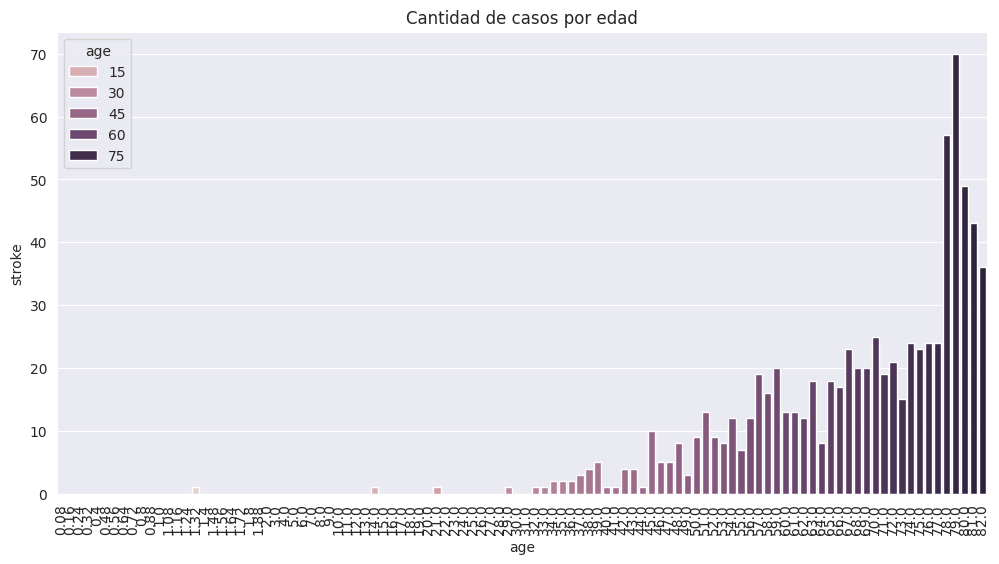

In [15]:
df_edad_stroke = df.groupby('age')['stroke'].sum().reset_index()
plt.figure(figsize = (12,6))
sns.barplot(data = df_edad_stroke, x = 'age', y = 'stroke', errorbar = None, order = df_edad_stroke['age'], hue = 'age')
plt.title('Cantidad de casos por edad')

plt.xticks(rotation = 90)
plt.show()

In [16]:
#Observo el promedio de edades en el conjunto de datos positivos
df_stroke.age.mean() #Aqui se ve que la edad es uno de los factores mas influyentes

68.14344827586207

Seteo la paleta de colores elegida

In [18]:
colores = ['#5D7CA6','#023059','#73A2BF','#59362E']

Text(0, 0.5, 'Casos de ACV')

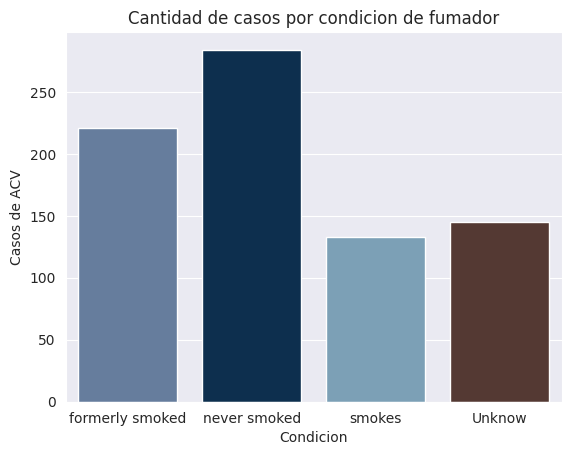

In [19]:
# De los casos positivos veo en que proporcion afecta a personas fumadoras y no fumadoras

sns.countplot(data = df_stroke, x = 'smoking_status', hue = 'smoking_status',palette=colores)

# Agrego título
plt.title('Cantidad de casos por condicion de fumador')

# Agrego labels de ejes
plt.xlabel('Condicion')
plt.ylabel('Casos de ACV')

Se observa que el ser fumador o fumadora no influye significativamente en el riesgo de un ACV para esta muestra

### 5.5 Analisis Bivariado

####5.5.1 Hombres y mujeres según empleo

Analisis de casos de ACV en mujeres y hombres segun su tipo de empleo

<ipython-input-20-73532cdb6dfd>:2: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(data = df_stroke, x = 'work_type', hue = 'gender',palette=colores)


Text(0, 0.5, 'Casos de ACV')

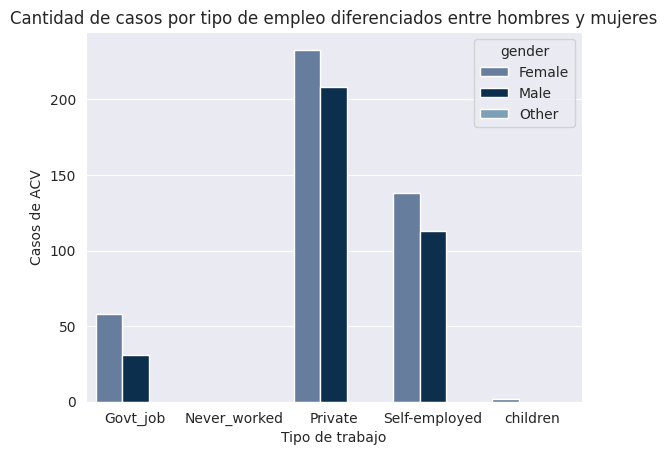

In [20]:
#Analizo los casos de ACV segun mujeres y hombres y su tipo de empleo
sns.countplot(data = df_stroke, x = 'work_type', hue = 'gender',palette=colores)

# Agrego título
plt.title('Cantidad de casos por tipo de empleo diferenciados entre hombres y mujeres')

# Agrego labels de ejes
plt.xlabel('Tipo de trabajo')
plt.ylabel('Casos de ACV')

Claramente la cantidad de casos es mayor en personas empleadas. Aunque estos valores no son significativos pues es posible que hayan mas personas con empleo privado que auto-empleados y trabajadores estatales. Para poder comparar bien es necesario normalizar las muestras. Tambien se observa que hay mas casos en mujeres que hombres por lo que se analizará estadísticamente este caso.

####5.5.2 ACV en hombres y mujeres

Análisis estadístico de casos de ACV en hombres y mujeres

Hipotesis = Hay mas casos de ACV en mujeres que en hombres
* H0 = El promedio de casos de mujeres es igual al de hombres.
* H0: Mu_hombres = Mu_mujeres
* H1 = Mu_hombres =! Mu_mujeres

In [21]:
#Divido el dataframe completo en hombres y mujeres
df_mujeres = df[df['gender'] == 'Female']
df_hombres = df[df['gender'] == 'Male']

#Calculo el promedio de hombres que tuvieron un ACV, es decir con stroke = 1. Este valor esta normalizado ya que suma todos los "1" y los divide por el total de hombres
df_hombres_mean = df_hombres['stroke'].mean()

#Realizo una prueba t para un nivel de significancia alfa = 5%
t_stat, p_valor = stats.ttest_1samp(a=df_mujeres['stroke'], popmean = df_hombres_mean)

print(f'El p valor para la hipotesis de que el riesgo en ACV en hombres es igual que en mujeres es:{p_valor} \ny su estadistico: {t_stat.round(2)} lo que evidencia que se rechaza H0 pero hay una discrepancia en el sentido de la variación ya que t_stat es negativo')


El p valor para la hipotesis de que el riesgo en ACV en hombres es igual que en mujeres es:0.0001319140608899619 
y su estadistico: -3.82 lo que evidencia que se rechaza H0 pero hay una discrepancia en el sentido de la variación ya que t_stat es negativo


Cuanto mas cerca de cero el P_valor indica que se rechaza con mayor confianza la hipotesis nula, en este caso H0 dice que el promedio de mujeres que sufrio un ACV es mayor que el de hombres
El valor de p_valor me da menor a un 5% por lo que se puede concluir que la hipotesis es falsa con un nivel de confianza de 1-alfa = 0.9998. Lo sorprendente es que al ser t_stat negativo me invierte totalmete la suposicion de que las mujeres tenian mas riesgos de tener un ACV. Es decir la nueva hipótesis es que los hombres tienene más posibilidades de tener un ACV. Esto puede ser explicado pues posiblemente la cantidad de pacientes mujeres sea mayor y en consecuencia la media calculada disminuya.


Considerando los resultados anteriores vuelvo a realizar el análisis con la nueva hipótesis
Hipotesis = Hay mas casos de ACV en mujeres que en hombres
* H0 = El promedio de casos de mujeres es igual al de hombres.
* H0: Mu_hombres = Mu_mujeres
* H1 = Mu_hombres > Mu_mujeres

In [22]:
# Realizo la misma prueba t pero con H0 = Promedio de casos de ACV en hombres. Mi hipótesis es que el riesgo de ACV en mujeres es menor que en hombres.
df_mujeres_mean = df_mujeres['stroke'].mean()

#Realizo una prueba t para un nivel de significancia alfa = 5%. Al probar solo para un lado de la ditribución debo dividir en 2 el p_valor
t_stat, p_valor = stats.ttest_1samp(a=df_hombres['stroke'], popmean = df_mujeres_mean)

print(f'El p valor para la hipotesis de que el riesgo en ACV en hombres es igual que en mujeres es:{p_valor/2} \ny su estadistico: {t_stat.round(2)} por lo que se rechaza la hipotesis nula')

#Realizo la prueba t pero comparando las 2 poblaciones
t_stat_comp, p_valor_comp = stats.ttest_ind (a= df_mujeres['stroke'], b=df_hombres['stroke'], equal_var = False)

print(f'El p valor para la hipotesis de que el riesgo en ACV en hombres es igual que en mujeres es:{p_valor_comp/2}\ny su estadistico: {t_stat_comp.round(2)}')

El p valor para la hipotesis de que el riesgo en ACV en hombres es igual que en mujeres es:0.0017173635076874773 
y su estadistico: 2.93 por lo que se rechaza la hipotesis nula
El p valor para la hipotesis de que el riesgo en ACV en hombres es igual que en mujeres es:0.010071144278962817
y su estadistico: -2.32


La conclusion de este análisis es que para la muestra suministrada los hombres tuvieron más casos de ACV en promedio que las mujeres aunque en un primer analisis gráfico parecía los contrario

####5.5.3 ACV por Hipertensión

Analisis de la relacion entre la hipertension arterial y la ocurrencia de ACV

<ipython-input-23-04c99c5f7af3>:2: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.violinplot(df, x='hypertension',y='bmi',hue = 'stroke', palette = colores)


Text(0, 0.5, 'Índice de masa corporal')

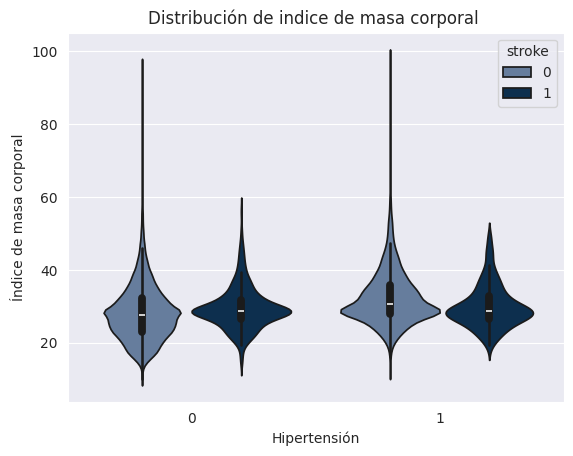

In [23]:
#Comparo las distribuciones de indice de masa corporal de personas con hipertension arterial que hayan sufrido un ACV
sns.violinplot(df, x='hypertension',y='bmi',hue = 'stroke', palette = colores)

# Agrego título
plt.title('Distribución de indice de masa corporal ')

# Agrego labels de ejes
plt.xlabel('Hipertensión')
plt.ylabel('Índice de masa corporal')

En los graficos tipo "Violin" no se aprecian diferencias importantes entre personas hipertensas y personas con presion arterial normal. Pero por experiencia, es un valor significante. Se seguirá analizando este parametro combinado con otros factores de riesgo en el desarrollo del trabajo final

#### 5.5.4 Correlación

Analisis de correlacion:
Verifico la relación entre la totalidad de las variables del dataset con lo casos positivos de ACV

In [24]:
# Coeficiente Phi para Nominal vs Nominal
# Features nominales: 'hypertension', 'heart_disease', ever_married, gender, work_type, Residence_type, smoking_status
# Con la variable target: "stroke"
nominales = ['hypertension','heart_disease','ever_married','gender_Male','gender_Female','work_type_Govt_job','work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children','Residence_type',
             'smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']

phi_coef_hypertension = pearsonr(df_limpia['stroke'], df_limpia['hypertension'])[0]
phi_coef_heart_disease = pearsonr(df_limpia['stroke'], df_limpia['heart_disease'])[0]
phi_coef_ever_married = pearsonr(df_limpia['stroke'], df_limpia['ever_married'])[0]
phi_coef_gender_Male = pearsonr(df_limpia['stroke'], df_limpia['gender_Male'])[0]
phi_coef_gender_Female = pearsonr(df_limpia['stroke'], df_limpia['gender_Female'])[0]
phi_coef_work_type_gob = pearsonr(df_limpia['stroke'], df_limpia['work_type_Govt_job'])[0]
phi_coef_work_type_never = pearsonr(df_limpia['stroke'], df_limpia['work_type_Never_worked'])[0]
phi_coef_work_type_private = pearsonr(df_limpia['stroke'], df_limpia['work_type_Private'])[0]
phi_coef_work_type_self = pearsonr(df_limpia['stroke'], df_limpia['work_type_Self-employed'])[0]
phi_coef_work_type_child = pearsonr(df_limpia['stroke'], df_limpia['work_type_children'])[0]
phi_coef_Residence_type = pearsonr(df_limpia['stroke'], df_limpia['Residence_type'])[0]
phi_coef_smoking_status_formely = pearsonr(df_limpia['stroke'], df_limpia['smoking_status_formerly smoked'])[0]
phi_coef_smoking_status_never = pearsonr(df_limpia['stroke'], df_limpia['smoking_status_never smoked'])[0]
phi_coef_smoking_status_smokes = pearsonr(df_limpia['stroke'], df_limpia['smoking_status_smokes'])[0]

print('phi_coefficient hypertension: ', phi_coef_hypertension)
print('phi_coefficient heart_disease: ', phi_coef_heart_disease)
print('phi_coefficient ever_married: ', phi_coef_ever_married)
print('phi_coefficient gender_Male: ', phi_coef_gender_Male)
print('phi_coefficient gender_Female: ', phi_coef_gender_Female)
print('phi_coefficient work_type_Govt_job: ', phi_coef_work_type_gob)
print('phi_coefficient work_type_Never_worked: ', phi_coef_work_type_never)
print('phi_coefficient work_type_Private: ', phi_coef_work_type_private)
print('phi_coefficient work_type_Self-employed: ', phi_coef_work_type_self)
print('phi_coefficient work_type_children: ', phi_coef_work_type_child)
print('phi_coefficient Residence_type: ', phi_coef_Residence_type)
print('phi_coefficient smoking_status_formerly smoked: ', phi_coef_smoking_status_formely)
print('phi_coefficient smoking_status_never smoked: ', phi_coef_smoking_status_never)
print('phi_coefficient smoking_status_smokes: ', phi_coef_smoking_status_smokes)

phi_coefficient hypertension:  0.07533224882587876
phi_coefficient heart_disease:  0.11376293746830243
phi_coefficient ever_married:  0.07191951625731983
phi_coefficient gender_Male:  0.011351997356543714
phi_coefficient gender_Female:  -0.01128102110930495
phi_coefficient work_type_Govt_job:  -0.004781543516998189
phi_coefficient work_type_Never_worked:  -0.008673984135506341
phi_coefficient work_type_Private:  -0.0024639380464948923
phi_coefficient work_type_Self-employed:  0.06119546572959897
phi_coefficient work_type_children:  -0.05411512332296733
phi_coefficient Residence_type:  0.0022468921838802638
phi_coefficient smoking_status_formerly smoked:  0.039306498430886336
phi_coefficient smoking_status_never smoked:  -0.0020151378168082918
phi_coefficient smoking_status_smokes:  0.007060838579905993


In [25]:
# Coeficiente biserial Nominal vs Numérico
# 'age' (Numérico), bmi, avg_glucose_level
# 'stroke' (Nominal)

biserial_coef_bmi = pointbiserialr(df_limpia['stroke'], df_limpia['bmi'])[0]
biserial_coef_age = pointbiserialr(df_limpia['stroke'], df_limpia['age'])[0]
biserial_coef_glucose = pointbiserialr(df_limpia['stroke'], df_limpia['avg_glucose_level'])[0]
biserial_coef_glucose2 = pointbiserialr(df['stroke'], df['avg_glucose_level'])[0]

print('biserial_coefficient bmi: ', biserial_coef_bmi)
print('biserial_coefficient age: ', biserial_coef_age)
print('biserial_coefficient glucose: ', biserial_coef_glucose)
print('biserial_coefficient glucose: ', biserial_coef_glucose2)

biserial_coefficient bmi:  0.018407443106265443
biserial_coefficient age:  0.15604896273558624
biserial_coefficient glucose:  0.07891709846978222
biserial_coefficient glucose:  0.07891709846978222


In [26]:
# Coeficiente Spearman para Ordinal vs Ordinal:
# 'bmi' (Ordinal) y 'age' (tratadas como ordinales solo para este ejemplo)
spearman_coefficient = spearmanr(df['bmi'], df['age'])[0]
print('spearman_coefficient: ', spearman_coefficient)

# Coeficiente Pearson para Numérico vs Numérico
# 'age' (Numérico) y 'bmi' (Numérico)
pearson_coefficient = pearsonr(df['age'], df['avg_glucose_level'])[0]
print('pearson_coefficient: ', pearson_coefficient)

spearman_coefficient:  0.38348763562087324
pearson_coefficient:  0.2376268428055483


Conclusiones del analisis de correlacion:
Se observa que no hay correlacion lineal significativa entre variables pero si se nota una leve correlacion entre la edad de las personas y la ocurrencia de ACV, tambien una correlacion leve entre las personas que tuvieron ataques cardiacos y los que tuvieron ACV. Analizando otras variables se ve que hay correlacion leve entre edad e indice de masa corporal y nivel de glucosa en sangre

### 5.5 Analsis multivariado

Se analiza la relacion entre las variables edad, bmi y nivel de glucosa en los casos positivos de ACV. A simple vista se observa que no hay una relación lineal entre alguna de estas variables. En el gráfico de nivel de glucosa podemos diferenciar 2 grandes zonas. Una con valores normales de glucosa y otra con valores mas altos (Prediabetes o diabetes)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/ax

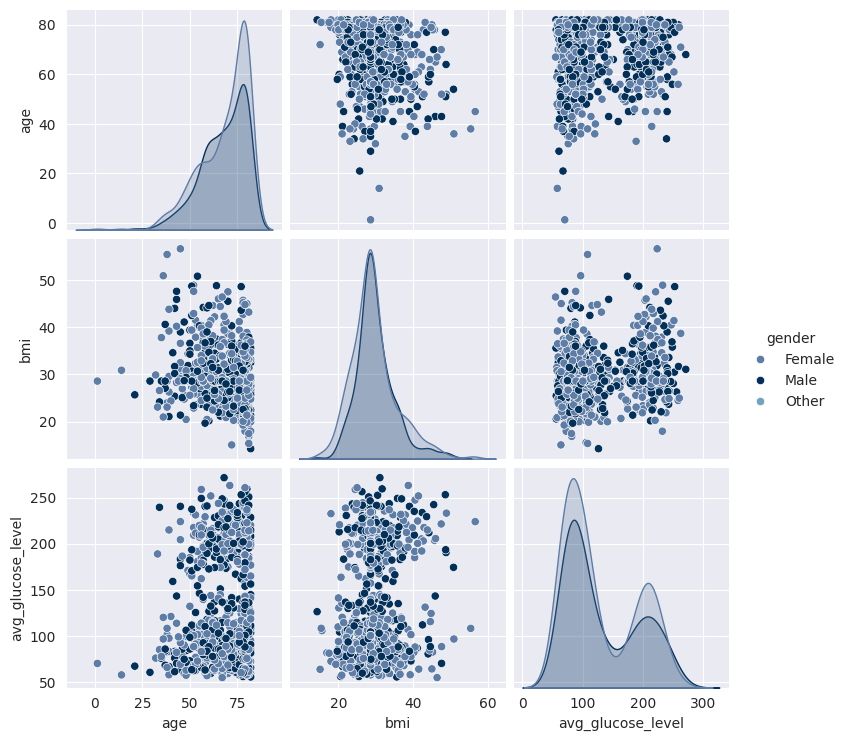

In [27]:
new_df = df_stroke[['age','bmi', 'avg_glucose_level','gender']]

sns.pairplot(data=new_df,hue = 'gender', palette = colores)

<ipython-input-29-54913c052cdf>:2: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(data=df, x='Residence_type', y='avg_glucose_level', hue='stroke', palette = colores)


Text(0, 0.5, 'Nivel de glucosa en sangre')

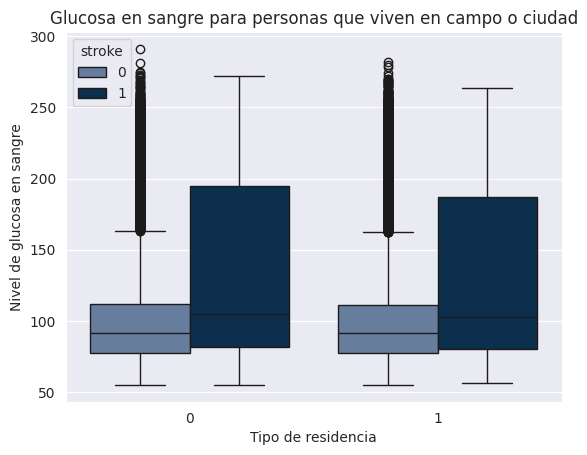

In [29]:
# Analizo como influye el tipo de residencia en los niveles de glucosa en sangre y diferenciando personas que sufrieron un ACV y las que no
sns.boxplot(data=df, x='Residence_type', y='avg_glucose_level', hue='stroke', palette = colores)

# Agrego título
plt.title('Glucosa en sangre para personas que viven en campo o ciudad')

# Agrego labels de ejes
plt.xlabel('Tipo de residencia')
plt.ylabel('Nivel de glucosa en sangre')

Se observa que practicamente no hay diferencia entre personas que viven en la ciudad o en el campo pero que si son muy distintas la graficas de personas que tuvieron un ACV y las que no. Es decir, la media de niveles de glucosa de personas que tuvieron ACV es mayor y ademas el rango es mas amplio hacia la parte superior, lo que significa que muchas personas con diabetes padecieron la enfermedad. Esto se tendrá en cuenta en futuras comprobaciones

###5.6 Conclusión de la visualización de datos


Podemos concluir de lo expuesto que la edad es un gran factor de riesgo de contraer un ACV. Tambien el nivel de glucemia en sangre parece influir. No hay datos precisos sobre la hipertensión pero se seguira investigando sobre esto. Tambien, se observa, que hay mas casos de ACV en mujeres que hombres pero al normalizar los datos la probabilidad es mas alta en hombres que mujeres

### Seccion 6 - Modelos de clasificación

Al tener que predecir si hay riesgo de ACV o no elijo modelos de clasificación. Hasta ahora, la mejor predicción se logró con un árbol de decisión, aunque aún sigue siendo muy imprecisa

####6.1 Separo en train y test

In [30]:
# Defino X e y
X = df_limpia.drop(['stroke','id'], axis=1)
y = df_limpia['stroke']

# Divido el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=49150, stratify=y)

####6.2 Arbol de decisión

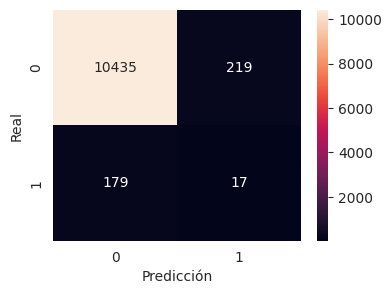

In [33]:
# 1. Arbol de clasificación
model = DecisionTreeClassifier(random_state=83, criterion='entropy', min_samples_leaf=1, max_features=None, splitter='best')
model.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred = model.predict(X_test)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Agrego título
#plt.title('Glucosa en sangre para personas que viven en campo o ciudad')

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

####6.3 Bosque aleatorio

In [34]:
#Inicializo el modelo
#BA_model = RandomForestClassifier(random_state = 49150)#, n_estimators = 100, min_samples_leaf = 120)
BA_model = RandomForestClassifier(random_state = 49150, max_depth = 16 ,min_samples_split = 0.219, n_estimators = 749)
#Entrenamiento de bosque aleatorio
BA_model.fit(X_train, y_train)



RandomForestClassifier(max_depth=16, min_samples_split=0.219, n_estimators=749,
                       random_state=49150)

In [35]:
# Predecir los valores de prueba
y_pred_Bosque = BA_model.predict(X_test)

#Predecir los valores de entrenamiento
y_pred_train_Bosque= BA_model.predict(X_train)

print("Prediccion de valores de prueba: ",y_pred_Bosque)
print("Prediccion de valores de entrenmiento: ",y_pred_train_Bosque)

Prediccion de valores de prueba:  [0 0 0 ... 0 0 0]
Prediccion de valores de entrenmiento:  [0 0 0 ... 0 0 0]


In [36]:
#Precision y accuracy del bosque aleatorio
print("Precision del Bosque aleatorio de decision: ",BA_model.score(X_test, y_test))
print(f'Accuracy: ', accuracy_score(y_test, y_pred_Bosque))
print(f'Recall: ', recall_score(y_test, y_pred_Bosque))

Precision del Bosque aleatorio de decision:  0.9819354838709677
Accuracy:  0.9819354838709677
Recall:  0.0


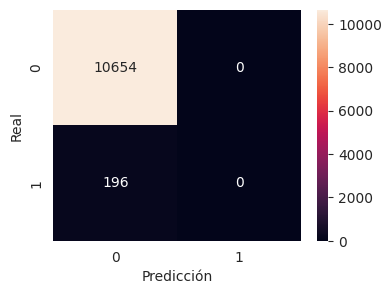

In [37]:
# Creo la matriz de confusión
cm_Bosque = confusion_matrix(y_test, y_pred_Bosque)

#HeatMap del Arbol
plt.figure(figsize=(4,3))
sns.heatmap(cm_Bosque, annot=True, fmt='d')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

Intento mejorar los hiperparámetros

In [40]:
# Definir el espacio de búsqueda de hiperparámetros para RandomForestClassifier
search_space = {
    'n_estimators': Integer(10, 1000),
    'max_depth': Integer(1, 20),
    'min_samples_split': Real(0.01, 1.0, 'uniform')
}

# Instanciar BayesSearchCV con el modelo y el espacio de búsqueda
clf = RandomForestClassifier(random_state=49150)
bayes_search = BayesSearchCV(clf, search_space, n_iter=5, scoring='recall', cv=10, random_state=49150, n_jobs=-1)

# Ajustar BayesSearchCV al conjunto de entrenamiento
bayes_search.fit(X_train, y_train)

# Imprimir mejores parametros
print(f'Best Parameters: {bayes_search.best_params_}')

Best Parameters: OrderedDict([('max_depth', 16), ('min_samples_split', 0.21925238956743517), ('n_estimators', 749)])


In [41]:
# Predecir sobre el conjunto de prueba
y_pred = bayes_search.predict(X_test)
y_proba = bayes_search.predict_proba(X_test)[:, 1]

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Imprimir las métricas
print('Accuracy: ', accuracy)
print(cm)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 - score: ', f1)
print('ROC AUC: ', roc_auc)

Accuracy:  0.9819354838709677
[[10654     0]
 [  196     0]]
Precision:  0.0
Recall:  0.0
F1 - score:  0.0
ROC AUC:  0.8629031253950802


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Aunque optimicé los hiperparámetros los resultados no son satisfactorios

####6.4 XGBoost

In [42]:
# Instanciar XGBoost
xgb = XGBClassifier(objective='multi:softmax', num_class=2, seed=49150, enable_categorical=True)

# Ajustar modelo
xgb.fit(X_train, y_train)

# Predecir
y_pred_xgb = xgb.predict(X_test)

# Calcular métricas
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)



In [43]:
# Imprimir métricas
print('Accuracy: ', accuracy_xgb)
print(cm_xgb)
print('Precision: ', precision_xgb)
print('Recall: ', recall_xgb)
print('F1 Score: ', f1_xgb)

Accuracy:  0.9813824884792627
[[10647     7]
 [  195     1]]
Precision:  0.125
Recall:  0.00510204081632653
F1 Score:  0.009803921568627449


####6.5 Catboost

In [44]:
# Instanciar CatBoost
catboost = CatBoostClassifier(iterations=1000, learning_rate=0.01, depth=3, verbose=False)

# Ajustar modelo
catboost.fit(X_train, y_train)

# Predecir
y_pred_cat = catboost.predict(X_test)

# Calcular métricas
accuracy_cat = accuracy_score(y_test, y_pred_cat)
cm_cat = confusion_matrix(y_test, y_pred_cat)
precision_cat = precision_score(y_test, y_pred_cat)#, average='weighted')
recall_cat = recall_score(y_test, y_pred_cat)#, average='weighted')
f1_cat = f1_score(y_test, y_pred_cat)#, average='weighted')

# Imprimir métricas
print('Accuracy: ', accuracy_cat)
print(cm_cat)
print('Precision: ', precision_cat)
print('Recall: ', recall_cat)
print('F1 Score: ', f1_cat)

Accuracy:  0.9818433179723502
[[10653     1]
 [  196     0]]
Precision:  0.0
Recall:  0.0
F1 Score:  0.0


####6.5 LGBM

In [45]:
# Instanciar LGBM
lgbm = LGBMClassifier(n_estimators=1000, learning_rate=0.1, verbose=-1)

# Ajustar modelo
lgbm.fit(X_train, y_train)

# Predecir
y_pred_lgbm = lgbm.predict(X_test)

# Calcular métricas
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm)#, average='weighted')
recall_lgbm = recall_score(y_test, y_pred_lgbm)#, average='weighted')
f1_lgbm = f1_score(y_test, y_pred_lgbm)#, average='weighted')

# Imprimir métricas
print('Accuracy: ', accuracy_lgbm)
print(cm_lgbm)
print('Precision: ', precision_lgbm)
print('Recall: ', recall_lgbm)
print('F1 Score: ', f1_lgbm)

Accuracy:  0.9802764976958526
[[10634    20]
 [  194     2]]
Precision:  0.09090909090909091
Recall:  0.01020408163265306
F1 Score:  0.018348623853211007
